In [ ]:
# CalculateMolDescriptors returns a dict with all calculated values which can be accessed with dict keys
from rdkit import Chem
from rdkit.Chem import AllChem 
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
Descriptors.CalcMolDescriptors(m)


In [ ]:
# Can calculate specific descriptors 
from rdkit import Chem
from rdkit.Chem import AllChem 
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')

print(f"Exact mol wt: {Descriptors.ExactMolWt(m)}")
print(f"TPSA : {Descriptors.TPSA(m)}")
print(f"HBA : {Descriptors.NumHAcceptors(m)}")
print(f"HBD : {Descriptors.NumHDonors(m)}")
print(f"Mol LogP : {Descriptors.MolLogP(m)}")

In [ ]:
# Calculatimg 3d descriptors 
rdkit.Chem.Draw.IPythonConsole.drawMol3D(m, view=None, confId=-1, drawAs=None, bgColor=None, size=None)rdkit.Chem.Draw.IPythonConsole.drawMol3D(m, view=None, confId=-1, drawAs=None, bgColor=None, size=None)

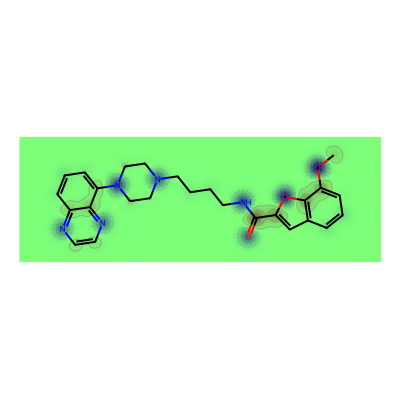

In [7]:
# Calculating Charges and visualization 

from rdkit import Chem
from rdkit.Chem import AllChem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
d2d = Draw.MolDraw2DCairo(400, 400)
_ = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, d2d, colorMap='jet', contourLines=10)



d2d.FinishDrawing()
image = d2d.GetDrawingText()

from IPython.display import Image, display
display(Image(data=image))

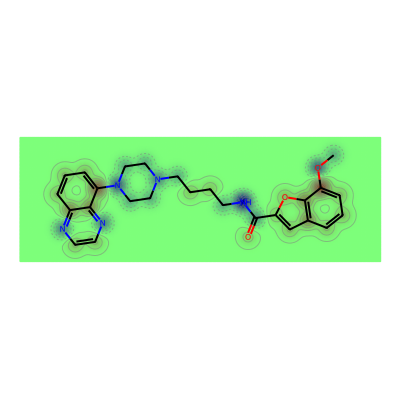

In [14]:
from rdkit.Chem import rdMolDescriptors
from rdkit import Chem
from rdkit.Chem import AllChem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
_ = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], d2d, colorMap='jet', contourLines=20)


d2d.FinishDrawing()
image = d2d.GetDrawingText()

from IPython.display import Image, display
display(Image(data=image))

Atomic Weights Visualization:


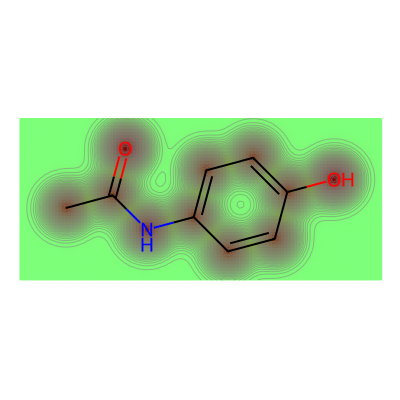

Aromaticity Visualization:


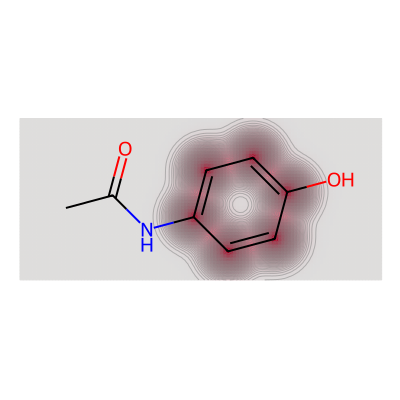

Hybridization Visualization:


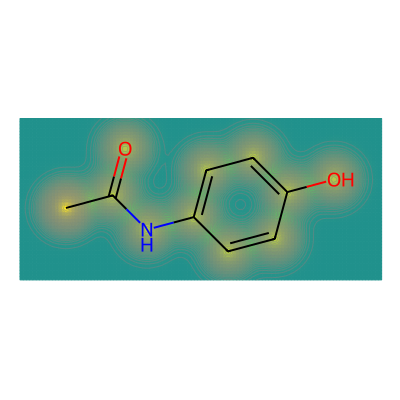

In [15]:
from rdkit import Chem
from rdkit.Chem import Draw, rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps

# Define the molecule: Paracetamol
paracetamol = Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")

# Atomic Weights
atomic_weights = [atom.GetMass() for atom in paracetamol.GetAtoms()]

# Aromaticity
aromaticity = [1 if atom.GetIsAromatic() else 0 for atom in paracetamol.GetAtoms()]

# Hybridization: Assign numerical values to hybridization types
hybridization_map = {Chem.rdchem.HybridizationType.SP: 1,
                     Chem.rdchem.HybridizationType.SP2: 2,
                     Chem.rdchem.HybridizationType.SP3: 3}
hybridization = [hybridization_map.get(atom.GetHybridization(), 0) for atom in paracetamol.GetAtoms()]

# Create MolDraw2DCairo object for rendering
d2d = Draw.MolDraw2DCairo(400, 400)

# Visualization of Atomic Weights
SimilarityMaps.GetSimilarityMapFromWeights(paracetamol, atomic_weights, d2d, colorMap='jet', contourLines=50)
d2d.FinishDrawing()
weights_image = d2d.GetDrawingText()

# Display in Jupyter Notebook
from IPython.display import Image, display
print("Atomic Weights Visualization:")
display(Image(data=weights_image))

# Visualization of Aromaticity
d2d = Draw.MolDraw2DCairo(400, 400)  # Reset d2d
SimilarityMaps.GetSimilarityMapFromWeights(paracetamol, aromaticity, d2d, colorMap='coolwarm', contourLines=50)
d2d.FinishDrawing()
aromaticity_image = d2d.GetDrawingText()

print("Aromaticity Visualization:")
display(Image(data=aromaticity_image))

# Visualization of Hybridization
d2d = Draw.MolDraw2DCairo(400, 400)  # Reset d2d
SimilarityMaps.GetSimilarityMapFromWeights(paracetamol, hybridization, d2d, colorMap='viridis', contourLines=50)
d2d.FinishDrawing()
hybridization_image = d2d.GetDrawingText()

print("Hybridization Visualization:")
display(Image(data=hybridization_image))
